# Automation Project 

## Create a Table of Financial Information from Raw Data 

### Disclaimer: All data is fictitious and PnL statement/structure is not based on anything - this is purely for educational purposes

## Scope

We have been given a task of automating some of the work for Finance. Currently there are automated reports exported by XYZ system provided in Excel that analysts normally use to develop a table of information. The data structure is generally consistent (yeah right...), but we should make this model as adaptable as possible just in case something changes.

The Data Sources will be the following:

- Sales_Data.xlsx
- Product_Table.xlsx
- Campaign_Table.xlsx


The requirement is to have a table that summarises the following:

- Year
- Gross Sales
- Units
- Volume (weight)
- Discount Cost ($)
- Net Sales
- Cost of Goods
- Contribution Margin
- Marketing Costs
- Tax
- Net Income


This will require the following Pandas techniques to achieve the table:

- Filtering and Sorting
- Grouping and Calculating
- Joining Datasets Together
- Creating new Measures
- Reshaping and Formatting Datasets

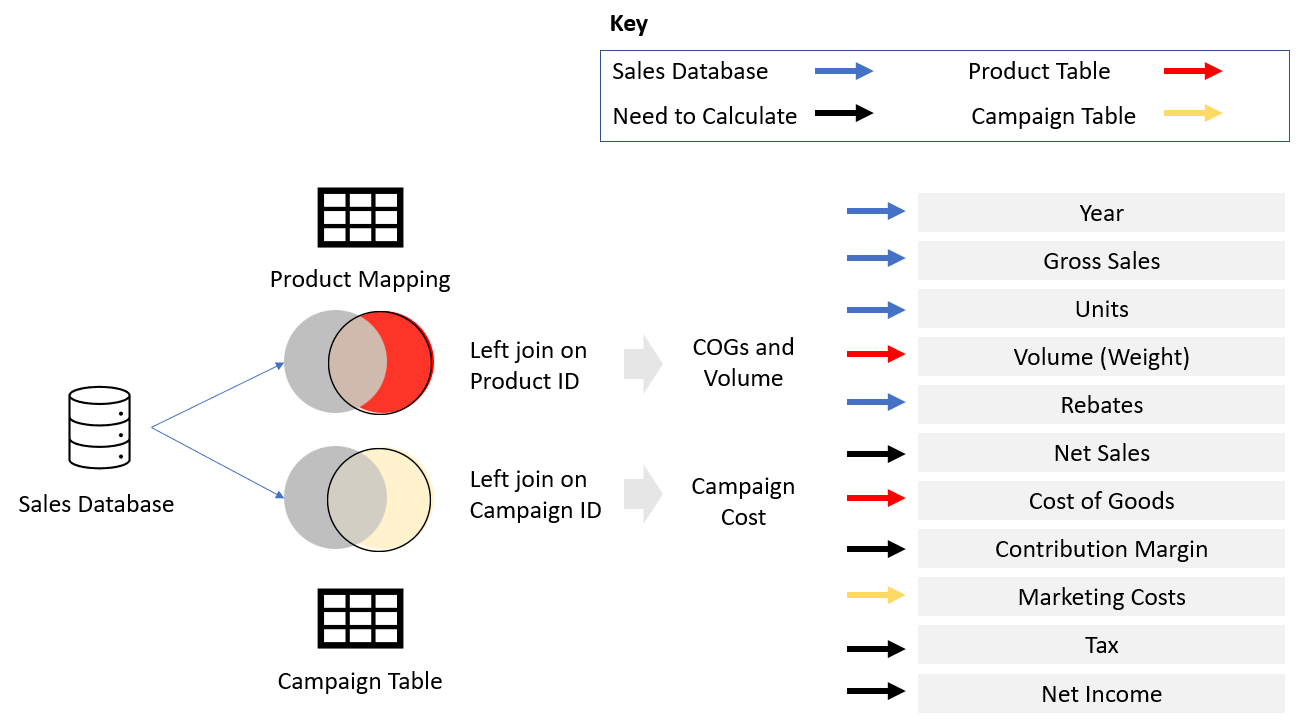

In [1]:
# Import the dependencies

import pandas as pd
import numpy as np

import warnings
warnings.simplefilter('ignore')

In [2]:
# Import the dataset

sales_data = pd.read_excel(r'../Data/SalesDataset.xlsx')

sales_data.head()

,Date,Campaign_ID,Customer_Group,Store_ID,Store_Name,Product_Category,Product_Group,Product,Product_ID,Units,Gross_Sales,Discount
0,31/12/2019,1000000.0,A Market That's Super,2001,Berowra Creek,Fruit,Tropical Fruit,Hydnora abyssinica,1100057,990,29.70,0.500000
1,30/04/2020,NaN,Super Super Market,1012,Bardia,Fruit,Tropical Fruit,Salak,1100094,630,0.00,0.498927
2,31/07/2020,NaN,Market,3000,Blackett,Fruit,Tropical Fruit,Kola nut,1100062,671,1241.35,0.494303
3,31/10/2020,NaN,A Market That's Super,2011,Bilgola Beach,Fruit,Tropical Fruit,Jackfruit,1100060,611,1283.10,0.493447
4,31/10/2020,NaN,A Market That's Super,2006,Beverly Hills,Fruit,Tropical Fruit,Terap,1100107,684,1026.00,0.492293


## Audit the Dataset

In [3]:
sales_data.isnull().sum()

Date                   0
Campaign_ID         7560
Customer_Group         0
Store_ID               0
Store_Name             0
Product_Category       0
Product_Group          0
Product               96
Product_ID             0
Units                  0
Gross_Sales            0
Discount               0
dtype: int64

In [4]:
check = sales_data[(sales_data["Product"].isnull())]

check

,Date,Campaign_ID,Customer_Group,Store_ID,Store_Name,Product_Category,Product_Group,Product,Product_ID,Units,Gross_Sales,Discount
6019,31/12/2020,5000000.0,A Market That's Super,2013,Birchgrove,Vegetables,Leafy and salad vegetables,NaN,2000026,804,7187.76,0.500000
6020,31/07/2020,5000000.0,Super Super Market,1005,Bangor,Vegetables,Leafy and salad vegetables,NaN,2000026,830,7420.20,0.500000
6021,31/01/2020,5000000.0,Super Super Market,1014,Bardwell Valley,Vegetables,Leafy and salad vegetables,NaN,2000026,843,7536.42,0.500000
6226,31/03/2020,5000000.0,A Market That's Super,2014,Birrong,Vegetables,Leafy and salad vegetables,NaN,2000045,858,4144.14,0.500000
6229,30/06/2020,5000000.0,A Market That's Super,2013,Birchgrove,Vegetables,Leafy and salad vegetables,NaN,2000045,800,3864.00,0.500000
6230,30/09/2020,5000000.0,Super Super Market,1004,Balmain East,Vegetables,Leafy and salad vegetables,NaN,2000045,921,4448.43,0.500000
6233,29/02/2020,5000000.0,A Market That's Super,2010,Bidwill,Vegetables,Leafy and salad vegetables,NaN,2000045,903,4361.49,0.500000
6237,31/03/2020,5000000.0,A Market That's Super,2000,Berowra,Vegetables,Leafy and salad vegetables,NaN,2000045,912,4404.96,0.500000
6238,30/06/2020,5000000.0,Market,3001,Blacktown,Vegetables,Leafy and salad vegetables,NaN,2000045,868,4192.44,0.500000
6968,31/01/2020,5000000.0,A Market That's Super,2009,Bickley Vale,Vegetables,Root and tuberous vegetables,NaN,2200003,905,2733.10,0.500000


In [5]:
# What impact does this have?

check["Gross_Sales"].sum() / sales_data["Gross_Sales"].sum()

0.011180452064457955

In [6]:
sales_data.nunique()

Date                   24
Campaign_ID             5
Customer_Group          4
Store_ID               49
Store_Name             49
Product_Category        2
Product_Group           9
Product               567
Product_ID            573
Units                 896
Gross_Sales         11129
Discount             6830
dtype: int64

In [7]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13752 entries, 0 to 13751
Data columns (total 12 columns):
Date                13752 non-null object
Campaign_ID         6192 non-null float64
Customer_Group      13752 non-null object
Store_ID            13752 non-null int64
Store_Name          13752 non-null object
Product_Category    13752 non-null object
Product_Group       13752 non-null object
Product             13656 non-null object
Product_ID          13752 non-null int64
Units               13752 non-null int64
Gross_Sales         13752 non-null float64
Discount            13752 non-null float64
dtypes: float64(3), int64(3), object(6)
memory usage: 1.3+ MB


In [8]:
sales_data.describe()

,Campaign_ID,Store_ID,Product_ID,Units,Gross_Sales,Discount
count,6.192000e+03,13752.000000,1.375200e+04,13752.000000,13752.00000,13752.000000
mean,3.909561e+06,1522.637944,1.514353e+06,609.100494,1466.78591,0.375934
std,1.451379e+06,668.205012,3.642487e+05,352.775568,1887.12660,0.161313
min,1.000000e+06,1000.000000,1.100000e+06,-1000.000000,-5270.00000,0.000000
25%,3.000000e+06,1012.000000,1.300011e+06,231.000000,79.77000,0.252790
50%,5.000000e+06,1024.000000,1.400038e+06,801.000000,635.14500,0.500000
75%,5.000000e+06,2007.000000,2.000004e+06,902.000000,2182.10000,0.500000
max,5.000000e+06,3004.000000,2.200045e+06,1000.000000,9860.45000,0.500000


## Conclusion

- Need to fix the missing Products - Product ID is still there, so we can find it from a product table?
- Date is an object - would be better to change this to a datetime object
- Not all Sales are related to a campaign (be cautious with joins)

## What do we have, what do we need?

- Year
- ~~Gross Sales~~
- ~~Units~~
- Volume (weight)
- Discount Cost ($) <-- We can get this
- Net Sales  <-- We can get this
- Cost of Goods
- Contribution Margin
- Marketing Costs
- Tax
- Net Income

In [9]:
# Add Net Sales and Discount Cost to our Sales table

def add_discount_dollar(col):
    gross_sales = col["Gross_Sales"]
    discount = col["Discount"]
    return gross_sales * discount


def add_net_sales(col):
    gross_sales = col["Gross_Sales"]
    discount = col["Discount"]
    return gross_sales - (gross_sales * discount)


sales_data["Discount_Cost"] = sales_data.apply(lambda row: add_discount_dollar(row), axis=1)
sales_data["Net_Sales"] = sales_data.apply(lambda row: add_net_sales(row), axis=1)
sales_data.head(100)


,Date,Campaign_ID,Customer_Group,Store_ID,Store_Name,Product_Category,Product_Group,Product,Product_ID,Units,Gross_Sales,Discount,Discount_Cost,Net_Sales
0,31/12/2019,1000000.0,A Market That's Super,2001,Berowra Creek,Fruit,Tropical Fruit,Hydnora abyssinica,1100057,990,29.70,0.500000,14.850000,14.850000
1,30/04/2020,NaN,Super Super Market,1012,Bardia,Fruit,Tropical Fruit,Salak,1100094,630,0.00,0.498927,0.000000,0.000000
2,31/07/2020,NaN,Market,3000,Blackett,Fruit,Tropical Fruit,Kola nut,1100062,671,1241.35,0.494303,613.603120,627.746880
3,31/10/2020,NaN,A Market That's Super,2011,Bilgola Beach,Fruit,Tropical Fruit,Jackfruit,1100060,611,1283.10,0.493447,633.142048,649.957952
4,31/10/2020,NaN,A Market That's Super,2006,Beverly Hills,Fruit,Tropical Fruit,Terap,1100107,684,1026.00,0.492293,505.092287,520.907713
5,29/02/2020,NaN,A Market That's Super,2003,Berowra Waters,Fruit,Tropical Fruit,Ooray,1100082,685,938.45,0.491922,461.644421,476.805579
6,31/07/2020,NaN,A Market That's Super,2000,Berowra,Fruit,Tropical Fruit,Passiflora platyloba,1100084,756,3054.24,0.490601,1498.411832,1555.828168
7,31/08/2020,NaN,Super Super Market,1001,Balgowlah,Fruit,Tropical Fruit,Wild jack,1100112,691,608.08,0.489313,297.541507,310.538493
8,31/12/2019,1000000.0,Super Super Market,1009,Bankstown Aerodrome,Fruit,Tropical Fruit,Ice-cream bean,1100058,998,0.00,0.500000,0.000000,0.000000
9,30/11/2020,NaN,A Market That's Super,2000,Berowra,Fruit,Tropical Fruit,Mammee,1100069,685,2664.65,0.485816,1294.530649,1370.119351


## What do we have, what do we need?

- Year
- ~~Gross Sales~~
- ~~Units~~
- Volume (weight) <-- We can get this from a product table
- ~~Discount Cost ($)~~
- ~~Net Sales~~
- Cost of Goods <-- We can get this from a product table
- Contribution Margin
- Marketing Costs
- Tax
- Net Income

In [10]:
# Import the Product Table

Product_Table = pd.read_excel(r"../Data/Product_Table.xlsx")

Product_Table.head()

,Product_Category,Product_Group,Product_Group_Description,Product,Product_ID,Species_Name,Product_Reference,Price,Size_Grams
0,Fruit,Citruses,Citruses represent fruit known botanically as ...,Calamondin,1400008,× Citrofortunella microcarpa,https://en.wikipedia.org/wiki/List_of_culinary...,0.90,66
1,Fruit,Pomes,Pomes include any crunchy accessory fruit that...,Shipova,1600019,× Sorbopyrus irregularis,https://en.wikipedia.org/wiki/List_of_culinary...,0.38,518
2,Fruit,Tropical Fruit,Tropical and tropical-like fruit are any culin...,Feijoa,1100046,Acca sellowiana,https://en.wikipedia.org/wiki/List_of_culinary...,0.20,263
3,Fruit,Berries,Berries represent any fruit that is berry-size...,Lemon aspen fruit,1300060,Acronychia acidula,https://en.wikipedia.org/wiki/List_of_culinary...,1.19,711
4,Fruit,Berries,Berries represent any fruit that is berry-size...,White aspen berry,1300105,Acronychia oblongifolia,https://en.wikipedia.org/wiki/List_of_culinary...,0.19,832


In [11]:
# A quick audit of the dataset

Product_Table.nunique()

Product_Category               2
Product_Group                  9
Product_Group_Description      7
Product                      567
Product_ID                   573
Species_Name                 556
Product_Reference              2
Price                        241
Size_Grams                   438
dtype: int64

In [12]:
Product_Table.isnull().sum()

Product_Category             0
Product_Group                0
Product_Group_Description    0
Product                      0
Product_ID                   0
Species_Name                 0
Product_Reference            0
Price                        0
Size_Grams                   0
dtype: int64

In [13]:
# We want to now join the product table to the sales table to get more data to create more metrics

sales_data = sales_data.merge(Product_Table, how='left', left_on='Product_ID', right_on='Product_ID')

sales_data.head()

,Date,Campaign_ID,Customer_Group,Store_ID,Store_Name,Product_Category_x,Product_Group_x,Product_x,Product_ID,Units,...,Discount_Cost,Net_Sales,Product_Category_y,Product_Group_y,Product_Group_Description,Product_y,Species_Name,Product_Reference,Price,Size_Grams
0,31/12/2019,1000000.0,A Market That's Super,2001,Berowra Creek,Fruit,Tropical Fruit,Hydnora abyssinica,1100057,990,...,14.850000,14.850000,Fruit,Tropical Fruit,Tropical and tropical-like fruit are any culin...,Hydnora abyssinica,Hydnora abyssinica,https://en.wikipedia.org/wiki/List_of_culinary...,0.20,150
1,30/04/2020,NaN,Super Super Market,1012,Bardia,Fruit,Tropical Fruit,Salak,1100094,630,...,0.000000,0.000000,Fruit,Tropical Fruit,Tropical and tropical-like fruit are any culin...,Salak,Salacca zalacca,https://en.wikipedia.org/wiki/List_of_culinary...,0.20,223
2,31/07/2020,NaN,Market,3000,Blackett,Fruit,Tropical Fruit,Kola nut,1100062,671,...,613.603120,627.746880,Fruit,Tropical Fruit,Tropical and tropical-like fruit are any culin...,Kola nut,Cola nitida,https://en.wikipedia.org/wiki/List_of_culinary...,0.83,245
3,31/10/2020,NaN,A Market That's Super,2011,Bilgola Beach,Fruit,Tropical Fruit,Jackfruit,1100060,611,...,633.142048,649.957952,Fruit,Tropical Fruit,Tropical and tropical-like fruit are any culin...,Jackfruit,Artocarpus heterophyllus,https://en.wikipedia.org/wiki/List_of_culinary...,1.62,126
4,31/10/2020,NaN,A Market That's Super,2006,Beverly Hills,Fruit,Tropical Fruit,Terap,1100107,684,...,505.092287,520.907713,Fruit,Tropical Fruit,Tropical and tropical-like fruit are any culin...,Terap,Artocarpus odoratissimus,https://en.wikipedia.org/wiki/List_of_culinary...,0.23,382


### Let's clean this up a little bit...

All we need for the metrics is:

- The cost price of the products for Cost of Goods
- The Weight of the Product for Volume

And...

- We can use the Product Table's information to replace the Sales Table's Product information because it's a more complete set

In [14]:
sales_data.columns

Index(['Date', 'Campaign_ID', 'Customer_Group', 'Store_ID', 'Store_Name',
       'Product_Category_x', 'Product_Group_x', 'Product_x', 'Product_ID',
       'Units', 'Gross_Sales', 'Discount', 'Discount_Cost', 'Net_Sales',
       'Product_Category_y', 'Product_Group_y', 'Product_Group_Description',
       'Product_y', 'Species_Name', 'Product_Reference', 'Price',
       'Size_Grams'],
      dtype='object')

In [15]:
# Let's Drop some columns..

sales_data.drop(['Product_Category_x', 'Product_Group_x', 'Product_x','Product_ID','Species_Name', 'Product_Reference'],
                axis=1,
               inplace=True)

sales_data.head()

,Date,Campaign_ID,Customer_Group,Store_ID,Store_Name,Units,Gross_Sales,Discount,Discount_Cost,Net_Sales,Product_Category_y,Product_Group_y,Product_Group_Description,Product_y,Price,Size_Grams
0,31/12/2019,1000000.0,A Market That's Super,2001,Berowra Creek,990,29.70,0.500000,14.850000,14.850000,Fruit,Tropical Fruit,Tropical and tropical-like fruit are any culin...,Hydnora abyssinica,0.20,150
1,30/04/2020,NaN,Super Super Market,1012,Bardia,630,0.00,0.498927,0.000000,0.000000,Fruit,Tropical Fruit,Tropical and tropical-like fruit are any culin...,Salak,0.20,223
2,31/07/2020,NaN,Market,3000,Blackett,671,1241.35,0.494303,613.603120,627.746880,Fruit,Tropical Fruit,Tropical and tropical-like fruit are any culin...,Kola nut,0.83,245
3,31/10/2020,NaN,A Market That's Super,2011,Bilgola Beach,611,1283.10,0.493447,633.142048,649.957952,Fruit,Tropical Fruit,Tropical and tropical-like fruit are any culin...,Jackfruit,1.62,126
4,31/10/2020,NaN,A Market That's Super,2006,Beverly Hills,684,1026.00,0.492293,505.092287,520.907713,Fruit,Tropical Fruit,Tropical and tropical-like fruit are any culin...,Terap,0.23,382


In [16]:
sales_data.isnull().sum()

Date                            0
Campaign_ID                  7560
Customer_Group                  0
Store_ID                        0
Store_Name                      0
Units                           0
Gross_Sales                     0
Discount                        0
Discount_Cost                   0
Net_Sales                       0
Product_Category_y              0
Product_Group_y                 0
Product_Group_Description       0
Product_y                       0
Price                           0
Size_Grams                      0
dtype: int64

In [17]:
sales_data.rename(columns={'Product_Category_y':'Product_Category',
                          'Product_Group_y':'Product_Group',
                          'Product_y':'Product'}, inplace=True)

sales_data.head()

,Date,Campaign_ID,Customer_Group,Store_ID,Store_Name,Units,Gross_Sales,Discount,Discount_Cost,Net_Sales,Product_Category,Product_Group,Product_Group_Description,Product,Price,Size_Grams
0,31/12/2019,1000000.0,A Market That's Super,2001,Berowra Creek,990,29.70,0.500000,14.850000,14.850000,Fruit,Tropical Fruit,Tropical and tropical-like fruit are any culin...,Hydnora abyssinica,0.20,150
1,30/04/2020,NaN,Super Super Market,1012,Bardia,630,0.00,0.498927,0.000000,0.000000,Fruit,Tropical Fruit,Tropical and tropical-like fruit are any culin...,Salak,0.20,223
2,31/07/2020,NaN,Market,3000,Blackett,671,1241.35,0.494303,613.603120,627.746880,Fruit,Tropical Fruit,Tropical and tropical-like fruit are any culin...,Kola nut,0.83,245
3,31/10/2020,NaN,A Market That's Super,2011,Bilgola Beach,611,1283.10,0.493447,633.142048,649.957952,Fruit,Tropical Fruit,Tropical and tropical-like fruit are any culin...,Jackfruit,1.62,126
4,31/10/2020,NaN,A Market That's Super,2006,Beverly Hills,684,1026.00,0.492293,505.092287,520.907713,Fruit,Tropical Fruit,Tropical and tropical-like fruit are any culin...,Terap,0.23,382


## Currently the Cost Price is only per 1 unit! We need to multiply by the number of units..

In [18]:
# Create a function to do this...

def total_cogs(col):
    units = col["Units"]
    cost_price = col["Price"]
    return units * cost_price


sales_data["Cost_Of_Goods"] = sales_data.apply(lambda row: total_cogs(row), axis=1)

sales_data.head()

,Date,Campaign_ID,Customer_Group,Store_ID,Store_Name,Units,Gross_Sales,Discount,Discount_Cost,Net_Sales,Product_Category,Product_Group,Product_Group_Description,Product,Price,Size_Grams,Cost_Of_Goods
0,31/12/2019,1000000.0,A Market That's Super,2001,Berowra Creek,990,29.70,0.500000,14.850000,14.850000,Fruit,Tropical Fruit,Tropical and tropical-like fruit are any culin...,Hydnora abyssinica,0.20,150,198.00
1,30/04/2020,NaN,Super Super Market,1012,Bardia,630,0.00,0.498927,0.000000,0.000000,Fruit,Tropical Fruit,Tropical and tropical-like fruit are any culin...,Salak,0.20,223,126.00
2,31/07/2020,NaN,Market,3000,Blackett,671,1241.35,0.494303,613.603120,627.746880,Fruit,Tropical Fruit,Tropical and tropical-like fruit are any culin...,Kola nut,0.83,245,556.93
3,31/10/2020,NaN,A Market That's Super,2011,Bilgola Beach,611,1283.10,0.493447,633.142048,649.957952,Fruit,Tropical Fruit,Tropical and tropical-like fruit are any culin...,Jackfruit,1.62,126,989.82
4,31/10/2020,NaN,A Market That's Super,2006,Beverly Hills,684,1026.00,0.492293,505.092287,520.907713,Fruit,Tropical Fruit,Tropical and tropical-like fruit are any culin...,Terap,0.23,382,157.32


In [19]:
def total_volume(col):
    units = col["Units"]
    weight = col["Size_Grams"]
    return units * weight

sales_data["Size_Grams"] = sales_data.apply(lambda row: total_volume(row), axis=1)

sales_data.head()

,Date,Campaign_ID,Customer_Group,Store_ID,Store_Name,Units,Gross_Sales,Discount,Discount_Cost,Net_Sales,Product_Category,Product_Group,Product_Group_Description,Product,Price,Size_Grams,Cost_Of_Goods
0,31/12/2019,1000000.0,A Market That's Super,2001,Berowra Creek,990,29.70,0.500000,14.850000,14.850000,Fruit,Tropical Fruit,Tropical and tropical-like fruit are any culin...,Hydnora abyssinica,0.20,148500,198.00
1,30/04/2020,NaN,Super Super Market,1012,Bardia,630,0.00,0.498927,0.000000,0.000000,Fruit,Tropical Fruit,Tropical and tropical-like fruit are any culin...,Salak,0.20,140490,126.00
2,31/07/2020,NaN,Market,3000,Blackett,671,1241.35,0.494303,613.603120,627.746880,Fruit,Tropical Fruit,Tropical and tropical-like fruit are any culin...,Kola nut,0.83,164395,556.93
3,31/10/2020,NaN,A Market That's Super,2011,Bilgola Beach,611,1283.10,0.493447,633.142048,649.957952,Fruit,Tropical Fruit,Tropical and tropical-like fruit are any culin...,Jackfruit,1.62,76986,989.82
4,31/10/2020,NaN,A Market That's Super,2006,Beverly Hills,684,1026.00,0.492293,505.092287,520.907713,Fruit,Tropical Fruit,Tropical and tropical-like fruit are any culin...,Terap,0.23,261288,157.32


## What do we have, what do we need?

- Year
- ~~Gross Sales~~
- ~~Units~~
- ~~Volume (weight)~~
- ~~Discount Cost ($)~~
- ~~Net Sales~~
- ~~Cost of Goods~~
- Contribution Margin <-- We can calculate this now
- Marketing Costs
- Tax
- Net Income

In [20]:
# We have been told that Contribution Margin is Net Sales - Cost of Goods (Easy!)

def calc_contr_margin(col):
    net_sales = col["Net_Sales"]
    cost_of_goods = col["Cost_Of_Goods"]
    return net_sales - cost_of_goods

sales_data["Contribution_Margin"] = sales_data.apply(lambda row: calc_contr_margin(row), axis=1)

sales_data.head()

,Date,Campaign_ID,Customer_Group,Store_ID,Store_Name,Units,Gross_Sales,Discount,Discount_Cost,Net_Sales,Product_Category,Product_Group,Product_Group_Description,Product,Price,Size_Grams,Cost_Of_Goods,Contribution_Margin
0,31/12/2019,1000000.0,A Market That's Super,2001,Berowra Creek,990,29.70,0.500000,14.850000,14.850000,Fruit,Tropical Fruit,Tropical and tropical-like fruit are any culin...,Hydnora abyssinica,0.20,148500,198.00,-183.150000
1,30/04/2020,NaN,Super Super Market,1012,Bardia,630,0.00,0.498927,0.000000,0.000000,Fruit,Tropical Fruit,Tropical and tropical-like fruit are any culin...,Salak,0.20,140490,126.00,-126.000000
2,31/07/2020,NaN,Market,3000,Blackett,671,1241.35,0.494303,613.603120,627.746880,Fruit,Tropical Fruit,Tropical and tropical-like fruit are any culin...,Kola nut,0.83,164395,556.93,70.816880
3,31/10/2020,NaN,A Market That's Super,2011,Bilgola Beach,611,1283.10,0.493447,633.142048,649.957952,Fruit,Tropical Fruit,Tropical and tropical-like fruit are any culin...,Jackfruit,1.62,76986,989.82,-339.862048
4,31/10/2020,NaN,A Market That's Super,2006,Beverly Hills,684,1026.00,0.492293,505.092287,520.907713,Fruit,Tropical Fruit,Tropical and tropical-like fruit are any culin...,Terap,0.23,261288,157.32,363.587713


## What do we have, what do we need?

- Year
- ~~Gross Sales~~
- ~~Units~~
- ~~Volume (weight)~~
- ~~Discount Cost ($)~~
- ~~Net Sales~~
- ~~Cost of Goods~~
- ~~Contribution Margin~~
- Marketing Costs
- Tax <-- We have found out that we have to calculate tax on berries from contribution margin (10%)
- Net Income

In [21]:
# Let's calculate the tax with a function

def tax_calc(col):
    while col["Product_Group"] == "Berries":
        if col["Contribution_Margin"] <= 0:
            return 0
        else:
            return col["Contribution_Margin"] * 0.01
        

sales_data["Tax"] = sales_data.apply(lambda row: tax_calc(row), axis=1)

check = sales_data[sales_data["Product_Group"] == "Berries"]

check.head()

,Date,Campaign_ID,Customer_Group,Store_ID,Store_Name,Units,Gross_Sales,Discount,Discount_Cost,Net_Sales,Product_Category,Product_Group,Product_Group_Description,Product,Price,Size_Grams,Cost_Of_Goods,Contribution_Margin,Tax
666,31/12/2020,NaN,Super Super Market,1004,Balmain East,719,3573.43,0.499430,1784.678848,1788.751152,Fruit,Berries,Berries represent any fruit that is berry-size...,Apple berry,3.96,40983,2847.24,-1058.488848,0.000000
667,30/09/2020,NaN,A Market That's Super,2008,Bexley North,767,575.25,0.497205,286.017245,289.232755,Fruit,Berries,Berries represent any fruit that is berry-size...,Camu camu,0.72,141128,552.24,-263.007245,0.000000
671,31/10/2020,NaN,A Market That's Super,2013,Birchgrove,673,0.00,0.495738,0.000000,0.000000,Fruit,Berries,Berries represent any fruit that is berry-size...,American black elderberry,0.20,221417,134.60,-134.600000,0.000000
672,30/11/2020,NaN,Market,3004,Blakehurst,663,1312.74,0.494029,648.532002,664.207998,Fruit,Berries,Berries represent any fruit that is berry-size...,Creeping raspberry,1.63,541008,1080.69,-416.482002,0.000000
684,30/09/2020,NaN,Not So Super Market,1019,Beaconsfield,697,1449.76,0.492558,714.090364,735.669636,Fruit,Berries,Berries represent any fruit that is berry-size...,Ceylon gooseberry,1.03,331075,717.91,17.759636,0.177596


## What do we have, what do we need?

- Year
- ~~Gross Sales~~
- ~~Units~~
- ~~Volume (weight)~~
- ~~Discount Cost ($)~~
- ~~Net Sales~~
- ~~Cost of Goods~~
- ~~Contribution Margin~~
- Marketing Costs <-- If we find this
- ~~Tax~~ 
- Net Income <-- We can calculate this

In [22]:
# Get the Marketing Campaign Data

marketing_data = pd.read_excel(r"../Data/Campaign_Table.xlsx")

sales_data = sales_data.merge(marketing_data, how="left", left_on="Campaign_ID", right_on="Campaign_ID")

check = sales_data[sales_data["Campaign_ID"].notna()]

check.head()

,Date,Campaign_ID,Customer_Group,Store_ID,Store_Name,Units,Gross_Sales,Discount,Discount_Cost,Net_Sales,...,Price,Size_Grams,Cost_Of_Goods,Contribution_Margin,Tax,Campaign_Name,Cost,Marketing_Manager,Brand_Manager,Channel
0,31/12/2019,1000000.0,A Market That's Super,2001,Berowra Creek,990,29.7,0.5,14.85,14.85,...,0.2,148500,198.0,-183.15,NaN,Build Trust,39648.86,Betty Sanders,Robert Phelps;Tracey Bellow,TV;Digital
8,31/12/2019,1000000.0,Super Super Market,1009,Bankstown Aerodrome,998,0.0,0.5,0.00,0.00,...,0.2,275448,199.6,-199.60,NaN,Build Trust,39648.86,Betty Sanders,Robert Phelps;Tracey Bellow,TV;Digital
17,31/12/2019,1000000.0,Not So Super Market,1021,Beecroft,929,0.0,0.5,0.00,0.00,...,0.2,256404,185.8,-185.80,NaN,Build Trust,39648.86,Betty Sanders,Robert Phelps;Tracey Bellow,TV;Digital
19,28/02/2019,1000000.0,Super Super Market,1004,Balmain East,949,0.0,0.5,0.00,0.00,...,0.2,261924,189.8,-189.80,NaN,Build Trust,39648.86,Betty Sanders,Robert Phelps;Tracey Bellow,TV;Digital
26,30/09/2019,1000000.0,Market,3004,Blakehurst,826,0.0,0.5,0.00,0.00,...,0.2,227976,165.2,-165.20,NaN,Build Trust,39648.86,Betty Sanders,Robert Phelps;Tracey Bellow,TV;Digital


In [23]:
sales_data.columns

Index(['Date', 'Campaign_ID', 'Customer_Group', 'Store_ID', 'Store_Name',
       'Units', 'Gross_Sales', 'Discount', 'Discount_Cost', 'Net_Sales',
       'Product_Category', 'Product_Group', 'Product_Group_Description',
       'Product', 'Price', 'Size_Grams', 'Cost_Of_Goods',
       'Contribution_Margin', 'Tax', 'Campaign_Name', 'Cost',
       'Marketing_Manager', 'Brand_Manager', 'Channel'],
      dtype='object')

In [24]:
sales_data.drop(["Campaign_Name", "Marketing_Manager", "Brand_Manager", "Channel"], axis=1, inplace=True)
sales_data.rename(columns={'Cost': 'Marketing_Cost'}, inplace=True)
sales_data.head()

,Date,Campaign_ID,Customer_Group,Store_ID,Store_Name,Units,Gross_Sales,Discount,Discount_Cost,Net_Sales,Product_Category,Product_Group,Product_Group_Description,Product,Price,Size_Grams,Cost_Of_Goods,Contribution_Margin,Tax,Marketing_Cost
0,31/12/2019,1000000.0,A Market That's Super,2001,Berowra Creek,990,29.70,0.500000,14.850000,14.850000,Fruit,Tropical Fruit,Tropical and tropical-like fruit are any culin...,Hydnora abyssinica,0.20,148500,198.00,-183.150000,NaN,39648.86
1,30/04/2020,NaN,Super Super Market,1012,Bardia,630,0.00,0.498927,0.000000,0.000000,Fruit,Tropical Fruit,Tropical and tropical-like fruit are any culin...,Salak,0.20,140490,126.00,-126.000000,NaN,NaN
2,31/07/2020,NaN,Market,3000,Blackett,671,1241.35,0.494303,613.603120,627.746880,Fruit,Tropical Fruit,Tropical and tropical-like fruit are any culin...,Kola nut,0.83,164395,556.93,70.816880,NaN,NaN
3,31/10/2020,NaN,A Market That's Super,2011,Bilgola Beach,611,1283.10,0.493447,633.142048,649.957952,Fruit,Tropical Fruit,Tropical and tropical-like fruit are any culin...,Jackfruit,1.62,76986,989.82,-339.862048,NaN,NaN
4,31/10/2020,NaN,A Market That's Super,2006,Beverly Hills,684,1026.00,0.492293,505.092287,520.907713,Fruit,Tropical Fruit,Tropical and tropical-like fruit are any culin...,Terap,0.23,261288,157.32,363.587713,NaN,NaN


In [25]:
sales_data.fillna(0, inplace=True)
sales_data.head()

,Date,Campaign_ID,Customer_Group,Store_ID,Store_Name,Units,Gross_Sales,Discount,Discount_Cost,Net_Sales,Product_Category,Product_Group,Product_Group_Description,Product,Price,Size_Grams,Cost_Of_Goods,Contribution_Margin,Tax,Marketing_Cost
0,31/12/2019,1000000.0,A Market That's Super,2001,Berowra Creek,990,29.70,0.500000,14.850000,14.850000,Fruit,Tropical Fruit,Tropical and tropical-like fruit are any culin...,Hydnora abyssinica,0.20,148500,198.00,-183.150000,0.0,39648.86
1,30/04/2020,0.0,Super Super Market,1012,Bardia,630,0.00,0.498927,0.000000,0.000000,Fruit,Tropical Fruit,Tropical and tropical-like fruit are any culin...,Salak,0.20,140490,126.00,-126.000000,0.0,0.00
2,31/07/2020,0.0,Market,3000,Blackett,671,1241.35,0.494303,613.603120,627.746880,Fruit,Tropical Fruit,Tropical and tropical-like fruit are any culin...,Kola nut,0.83,164395,556.93,70.816880,0.0,0.00
3,31/10/2020,0.0,A Market That's Super,2011,Bilgola Beach,611,1283.10,0.493447,633.142048,649.957952,Fruit,Tropical Fruit,Tropical and tropical-like fruit are any culin...,Jackfruit,1.62,76986,989.82,-339.862048,0.0,0.00
4,31/10/2020,0.0,A Market That's Super,2006,Beverly Hills,684,1026.00,0.492293,505.092287,520.907713,Fruit,Tropical Fruit,Tropical and tropical-like fruit are any culin...,Terap,0.23,261288,157.32,363.587713,0.0,0.00


In [26]:
campaign_count = sales_data.groupby(['Campaign_ID']).agg({'Campaign_ID':["count"]})


sales_data = sales_data.merge(campaign_count, left_on="Campaign_ID", right_index=True)


sales_data.columns = [*sales_data.columns[:-1], 'Campaign_Count']

sales_data

,Date,Campaign_ID,Customer_Group,Store_ID,Store_Name,Units,Gross_Sales,Discount,Discount_Cost,Net_Sales,...,Product_Group,Product_Group_Description,Product,Price,Size_Grams,Cost_Of_Goods,Contribution_Margin,Tax,Marketing_Cost,Campaign_Count
0,31/12/2019,1000000.0,A Market That's Super,2001,Berowra Creek,990,29.70,0.500000,14.850000,14.850000,...,Tropical Fruit,Tropical and tropical-like fruit are any culin...,Hydnora abyssinica,0.20,148500,198.00,-183.150000,0.0,39648.86,684
8,31/12/2019,1000000.0,Super Super Market,1009,Bankstown Aerodrome,998,0.00,0.500000,0.000000,0.000000,...,Tropical Fruit,Tropical and tropical-like fruit are any culin...,Ice-cream bean,0.20,275448,199.60,-199.600000,0.0,39648.86,684
17,31/12/2019,1000000.0,Not So Super Market,1021,Beecroft,929,0.00,0.500000,0.000000,0.000000,...,Tropical Fruit,Tropical and tropical-like fruit are any culin...,Ice-cream bean,0.20,256404,185.80,-185.800000,0.0,39648.86,684
19,28/02/2019,1000000.0,Super Super Market,1004,Balmain East,949,0.00,0.500000,0.000000,0.000000,...,Tropical Fruit,Tropical and tropical-like fruit are any culin...,Ice-cream bean,0.20,261924,189.80,-189.800000,0.0,39648.86,684
26,30/09/2019,1000000.0,Market,3004,Blakehurst,826,0.00,0.500000,0.000000,0.000000,...,Tropical Fruit,Tropical and tropical-like fruit are any culin...,Ice-cream bean,0.20,227976,165.20,-165.200000,0.0,39648.86,684
28,31/10/2019,1000000.0,Super Super Market,1014,Bardwell Valley,850,0.00,0.500000,0.000000,0.000000,...,Tropical Fruit,Tropical and tropical-like fruit are any culin...,Ice-cream bean,0.20,234600,170.00,-170.000000,0.0,39648.86,684
29,30/09/2019,1000000.0,Super Super Market,1003,Balmain,875,0.00,0.500000,0.000000,0.000000,...,Tropical Fruit,Tropical and tropical-like fruit are any culin...,Ice-cream bean,0.20,241500,175.00,-175.000000,0.0,39648.86,684
30,31/12/2019,1000000.0,Super Super Market,1000,Badgerys Creek,820,0.00,0.500000,0.000000,0.000000,...,Tropical Fruit,Tropical and tropical-like fruit are any culin...,Ice-cream bean,0.20,226320,164.00,-164.000000,0.0,39648.86,684
32,31/08/2019,1000000.0,A Market That's Super,2014,Birrong,945,1738.80,0.500000,869.400000,869.400000,...,Tropical Fruit,Tropical and tropical-like fruit are any culin...,Ilama,1.54,407295,1455.30,-585.900000,0.0,39648.86,684
34,31/03/2019,1000000.0,Super Super Market,1006,Banksia,909,1672.56,0.500000,836.280000,836.280000,...,Tropical Fruit,Tropical and tropical-like fruit are any culin...,Ilama,1.54,391779,1399.86,-563.580000,0.0,39648.86,684


In [27]:
# Because Marketing Cost is a fixed amount, we can calculate it as if it was spread equally..

# We take the max of the cost and divide it by the number of times it occurs

def spread_marketing_cost(row):
    total_marketing_cost = row["Marketing_Cost"]
    count_marketing_cost = row["Campaign_Count"]
    return total_marketing_cost / count_marketing_cost

sales_data["Spread_Marketing_Cost"] = sales_data.apply(lambda row: spread_marketing_cost(row), axis=1)
sales_data

,Date,Campaign_ID,Customer_Group,Store_ID,Store_Name,Units,Gross_Sales,Discount,Discount_Cost,Net_Sales,...,Product_Group_Description,Product,Price,Size_Grams,Cost_Of_Goods,Contribution_Margin,Tax,Marketing_Cost,Campaign_Count,Spread_Marketing_Cost
0,31/12/2019,1000000.0,A Market That's Super,2001,Berowra Creek,990,29.70,0.500000,14.850000,14.850000,...,Tropical and tropical-like fruit are any culin...,Hydnora abyssinica,0.20,148500,198.00,-183.150000,0.0,39648.86,684,57.966170
8,31/12/2019,1000000.0,Super Super Market,1009,Bankstown Aerodrome,998,0.00,0.500000,0.000000,0.000000,...,Tropical and tropical-like fruit are any culin...,Ice-cream bean,0.20,275448,199.60,-199.600000,0.0,39648.86,684,57.966170
17,31/12/2019,1000000.0,Not So Super Market,1021,Beecroft,929,0.00,0.500000,0.000000,0.000000,...,Tropical and tropical-like fruit are any culin...,Ice-cream bean,0.20,256404,185.80,-185.800000,0.0,39648.86,684,57.966170
19,28/02/2019,1000000.0,Super Super Market,1004,Balmain East,949,0.00,0.500000,0.000000,0.000000,...,Tropical and tropical-like fruit are any culin...,Ice-cream bean,0.20,261924,189.80,-189.800000,0.0,39648.86,684,57.966170
26,30/09/2019,1000000.0,Market,3004,Blakehurst,826,0.00,0.500000,0.000000,0.000000,...,Tropical and tropical-like fruit are any culin...,Ice-cream bean,0.20,227976,165.20,-165.200000,0.0,39648.86,684,57.966170
28,31/10/2019,1000000.0,Super Super Market,1014,Bardwell Valley,850,0.00,0.500000,0.000000,0.000000,...,Tropical and tropical-like fruit are any culin...,Ice-cream bean,0.20,234600,170.00,-170.000000,0.0,39648.86,684,57.966170
29,30/09/2019,1000000.0,Super Super Market,1003,Balmain,875,0.00,0.500000,0.000000,0.000000,...,Tropical and tropical-like fruit are any culin...,Ice-cream bean,0.20,241500,175.00,-175.000000,0.0,39648.86,684,57.966170
30,31/12/2019,1000000.0,Super Super Market,1000,Badgerys Creek,820,0.00,0.500000,0.000000,0.000000,...,Tropical and tropical-like fruit are any culin...,Ice-cream bean,0.20,226320,164.00,-164.000000,0.0,39648.86,684,57.966170
32,31/08/2019,1000000.0,A Market That's Super,2014,Birrong,945,1738.80,0.500000,869.400000,869.400000,...,Tropical and tropical-like fruit are any culin...,Ilama,1.54,407295,1455.30,-585.900000,0.0,39648.86,684,57.966170
34,31/03/2019,1000000.0,Super Super Market,1006,Banksia,909,1672.56,0.500000,836.280000,836.280000,...,Tropical and tropical-like fruit are any culin...,Ilama,1.54,391779,1399.86,-563.580000,0.0,39648.86,684,57.966170


In [28]:
def get_net_income(col):
    contribution_margin = col["Contribution_Margin"]
    tax = col["Tax"]
    marketing_cost = col["Spread_Marketing_Cost"]
    return contribution_margin - tax - marketing_cost

sales_data["Net_Income"] = sales_data.apply(lambda row: get_net_income(row), axis=1)

sales_data.head()

,Date,Campaign_ID,Customer_Group,Store_ID,Store_Name,Units,Gross_Sales,Discount,Discount_Cost,Net_Sales,...,Product,Price,Size_Grams,Cost_Of_Goods,Contribution_Margin,Tax,Marketing_Cost,Campaign_Count,Spread_Marketing_Cost,Net_Income
0,31/12/2019,1000000.0,A Market That's Super,2001,Berowra Creek,990,29.7,0.5,14.85,14.85,...,Hydnora abyssinica,0.2,148500,198.0,-183.15,0.0,39648.86,684,57.96617,-241.11617
8,31/12/2019,1000000.0,Super Super Market,1009,Bankstown Aerodrome,998,0.0,0.5,0.00,0.00,...,Ice-cream bean,0.2,275448,199.6,-199.60,0.0,39648.86,684,57.96617,-257.56617
17,31/12/2019,1000000.0,Not So Super Market,1021,Beecroft,929,0.0,0.5,0.00,0.00,...,Ice-cream bean,0.2,256404,185.8,-185.80,0.0,39648.86,684,57.96617,-243.76617
19,28/02/2019,1000000.0,Super Super Market,1004,Balmain East,949,0.0,0.5,0.00,0.00,...,Ice-cream bean,0.2,261924,189.8,-189.80,0.0,39648.86,684,57.96617,-247.76617
26,30/09/2019,1000000.0,Market,3004,Blakehurst,826,0.0,0.5,0.00,0.00,...,Ice-cream bean,0.2,227976,165.2,-165.20,0.0,39648.86,684,57.96617,-223.16617


## What do we have, what do we need?

- Year <-- Final one to go
- ~~Gross Sales~~
- ~~Units~~
- ~~Volume (weight)~~
- ~~Discount Cost ($)~~
- ~~Net Sales~~
- ~~Cost of Goods~~
- ~~Contribution Margin~~
- ~~Marketing Costs~~
- ~~Tax~~ 
- ~~Net Income~~

In [29]:
sales_data['Year'] = pd.DatetimeIndex(sales_data['Date']).year
sales_data.head()

,Date,Campaign_ID,Customer_Group,Store_ID,Store_Name,Units,Gross_Sales,Discount,Discount_Cost,Net_Sales,...,Price,Size_Grams,Cost_Of_Goods,Contribution_Margin,Tax,Marketing_Cost,Campaign_Count,Spread_Marketing_Cost,Net_Income,Year
0,31/12/2019,1000000.0,A Market That's Super,2001,Berowra Creek,990,29.7,0.5,14.85,14.85,...,0.2,148500,198.0,-183.15,0.0,39648.86,684,57.96617,-241.11617,2019
8,31/12/2019,1000000.0,Super Super Market,1009,Bankstown Aerodrome,998,0.0,0.5,0.00,0.00,...,0.2,275448,199.6,-199.60,0.0,39648.86,684,57.96617,-257.56617,2019
17,31/12/2019,1000000.0,Not So Super Market,1021,Beecroft,929,0.0,0.5,0.00,0.00,...,0.2,256404,185.8,-185.80,0.0,39648.86,684,57.96617,-243.76617,2019
19,28/02/2019,1000000.0,Super Super Market,1004,Balmain East,949,0.0,0.5,0.00,0.00,...,0.2,261924,189.8,-189.80,0.0,39648.86,684,57.96617,-247.76617,2019
26,30/09/2019,1000000.0,Market,3004,Blakehurst,826,0.0,0.5,0.00,0.00,...,0.2,227976,165.2,-165.20,0.0,39648.86,684,57.96617,-223.16617,2019


# We now have all the ingredients to put the table together...

In [30]:
# Groupby to create our table

table = sales_data.groupby(["Year"]).agg(
{
    'Gross_Sales':['sum'],
    'Units': ['sum'],
    'Size_Grams': ['sum'],
    'Discount_Cost': ['sum'],
    'Net_Sales': ['sum'],
    'Cost_Of_Goods': ['sum'],
    'Contribution_Margin': ['sum'],
    'Spread_Marketing_Cost': ['sum'],
    'Tax': ['sum'],
    'Net_Income': ['sum']
})

table.columns = table.columns.droplevel(1)

table

,Gross_Sales,Units,Size_Grams,Discount_Cost,Net_Sales,Cost_Of_Goods,Contribution_Margin,Spread_Marketing_Cost,Tax,Net_Income
Year,,,,,,,,,,
2019,9814064.50,4151687,2024128504,4.555448e+06,5.258617e+06,4831741.31,426875.521759,78008.98,3813.858705,345052.683054
2020,10357175.33,4224663,2042959965,4.838334e+06,5.518841e+06,5231474.95,287366.418347,88673.54,3310.814039,195382.064308


In [31]:
table.reset_index(inplace=True, col_level=0)
table.head()

,Year,Gross_Sales,Units,Size_Grams,Discount_Cost,Net_Sales,Cost_Of_Goods,Contribution_Margin,Spread_Marketing_Cost,Tax,Net_Income
0,2019,9814064.50,4151687,2024128504,4.555448e+06,5.258617e+06,4831741.31,426875.521759,78008.98,3813.858705,345052.683054
1,2020,10357175.33,4224663,2042959965,4.838334e+06,5.518841e+06,5231474.95,287366.418347,88673.54,3310.814039,195382.064308


In [32]:
values = ["Gross_Sales",
          "Units",
          "Size_Grams",
          "Discount_Cost",
          "Net_Sales",
          "Cost_Of_Goods",
         "Contribution_Margin",
         "Spread_Marketing_Cost",
         "Tax",
         "Net_Income"]

table = table.pivot_table(columns="Year", values=values, aggfunc='sum')

# Create the order of the rows

table = table.loc[["Gross_Sales",
          "Units",
          "Size_Grams",
          "Discount_Cost",
          "Net_Sales",
          "Cost_Of_Goods",
         "Contribution_Margin",
         "Spread_Marketing_Cost",
         "Tax",
         "Net_Income"], :]

table.reset_index(inplace=True)
table

Year,index,2019,2020
0,Gross_Sales,9.814065e+06,1.035718e+07
1,Units,4.151687e+06,4.224663e+06
2,Size_Grams,2.024129e+09,2.042960e+09
3,Discount_Cost,4.555448e+06,4.838334e+06
4,Net_Sales,5.258617e+06,5.518841e+06
5,Cost_Of_Goods,4.831741e+06,5.231475e+06
6,Contribution_Margin,4.268755e+05,2.873664e+05
7,Spread_Marketing_Cost,7.800898e+04,8.867354e+04
8,Tax,3.813859e+03,3.310814e+03
9,Net_Income,3.450527e+05,1.953821e+05


In [33]:
table[2019] = table[2019].apply(lambda row: "{0:,.0f}".format(row))
table[2020] = table[2020].apply(lambda row: "{0:,.0f}".format(row))
table

Year,index,2019,2020
0,Gross_Sales,"9,814,065","10,357,175"
1,Units,"4,151,687","4,224,663"
2,Size_Grams,"2,024,128,504","2,042,959,965"
3,Discount_Cost,"4,555,448","4,838,334"
4,Net_Sales,"5,258,617","5,518,841"
5,Cost_Of_Goods,"4,831,741","5,231,475"
6,Contribution_Margin,"426,876","287,366"
7,Spread_Marketing_Cost,"78,009","88,674"
8,Tax,"3,814","3,311"
9,Net_Income,"345,053","195,382"


In [34]:
table["index"]= table["index"].replace("Gross_Sales", "Gross Sales ($)") 
table["index"]= table["index"].replace("Size_Grams", "Volume (Grams)") 
table["index"]= table["index"].replace("Discount_Cost", "Rebates ($)") 
table["index"]= table["index"].replace("Net_Sales", "Net Sales ($)") 
table["index"]= table["index"].replace("Cost_Of_Goods", "Cost of Goods ($)") 
table["index"]= table["index"].replace("Contribution_Margin", "Contribution Margin Sales ($)") 
table["index"]= table["index"].replace("Spread_Marketing_Cost", "Marketing Costs ($)") 
table["index"]= table["index"].replace("Tax", "Tax ($)") 
table["index"]= table["index"].replace("Net_Income", "Net Income ($)") 


table

Year,index,2019,2020
0,Gross Sales ($),"9,814,065","10,357,175"
1,Units,"4,151,687","4,224,663"
2,Volume (Grams),"2,024,128,504","2,042,959,965"
3,Rebates ($),"4,555,448","4,838,334"
4,Net Sales ($),"5,258,617","5,518,841"
5,Cost of Goods ($),"4,831,741","5,231,475"
6,Contribution Margin Sales ($),"426,876","287,366"
7,Marketing Costs ($),"78,009","88,674"
8,Tax ($),"3,814","3,311"
9,Net Income ($),"345,053","195,382"


In [35]:
table = table.rename(columns={'index': ' '})
table.reset_index(drop=True, inplace=True)


table.to_excel("final_table.xlsx", index=False)
table.style.hide_index()

,2019,2020
Gross Sales ($),"9,814,065","10,357,175"
Units,"4,151,687","4,224,663"
Volume (Grams),"2,024,128,504","2,042,959,965"
Rebates ($),"4,555,448","4,838,334"
Net Sales ($),"5,258,617","5,518,841"
Cost of Goods ($),"4,831,741","5,231,475"
Contribution Margin Sales ($),"426,876","287,366"
Marketing Costs ($),"78,009","88,674"
Tax ($),"3,814","3,311"
Net Income ($),"345,053","195,382"
